In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(url, delimiter=",")

In [3]:
print(my_data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
print(X[0:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]


In [5]:
# Encoder les variables catégorielles
le_sex = preprocessing.LabelEncoder()
X[:, 1] = le_sex.fit_transform(X[:, 1])
le_BP = preprocessing.LabelEncoder()
X[:, 2] = le_BP.fit_transform(X[:, 2])
le_Chol = preprocessing.LabelEncoder()
X[:, 3] = le_Chol.fit_transform(X[:, 3])

In [6]:
# Extraire la variable cible
y = my_data["Drug"]
# Diviser les données en ensembles d'entraînement et de test
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [7]:
# Créer et entraîner le modèle d'arbre de décision
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
# Faire des prédictions sur l'ensemble de test
predTree = drugTree.predict(X_testset)

In [9]:
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_testset, predTree))

Decision Tree's Accuracy: 0.9833333333333333


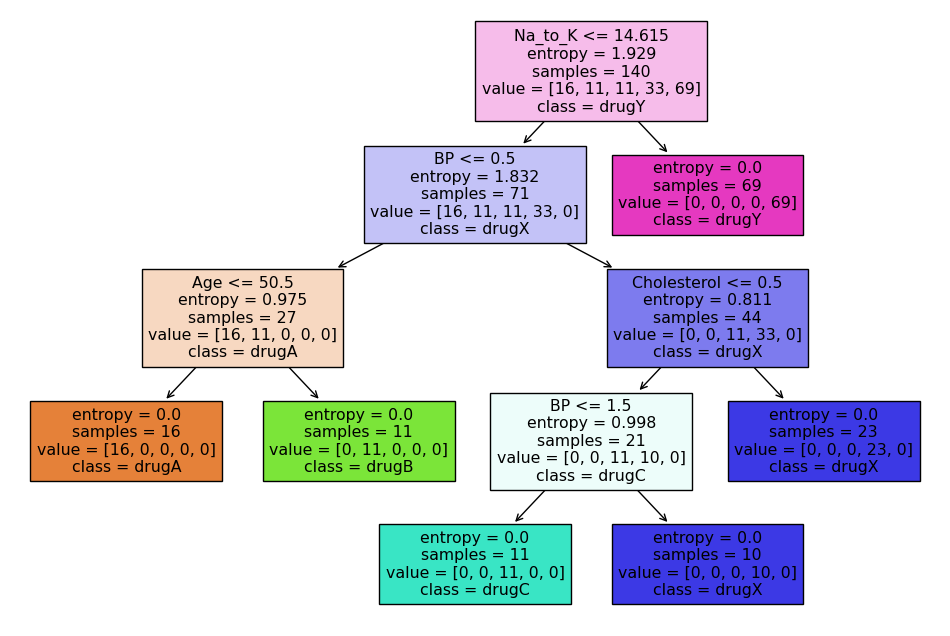

In [10]:
plt.figure(figsize=(12, 8))
tree.plot_tree(drugTree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=drugTree.classes_.tolist())
plt.show()